# <center>        **Machine Learning (S2-22_DSECLZG565) - ASSIGNMENT**</center>

## Group No 67

## Group Member Names:
 1. Senthilkumar K Bits ID : 2022DA04148
 2. Surya K Bits ID :  2022DA04742
 3. Lakshmanaperumal K Bits ID : 2022DA04733
   

## **Part A**
### **1. Import Libraries/Dataset**

**a) Importing the Required Libraries**

In [68]:
import numpy as np
import pandas as pd
import urllib
import seaborn as sns
import matplotlib.pyplot as plt
import io
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


**b) Download the Dataset**

In [69]:
# replace the data link for whichever file you want to read
data = urllib.request.urlopen("https://raw.githubusercontent.com/klpmecon/AssignmentFiles/main/KDDTest%2B.arff").readlines()
columns = []
len_attr = len('@attribute')

# get the columns
for line in data:
    line = line.decode('utf-8')
    if line.startswith('@attribute '):
        col_name = line[len_attr:].split()[0].replace("'",'')
        columns.append(col_name)

rows = []
len_row = len(columns)
# get the rows
for line in data:
    line = line.decode('utf-8')
    if not line.startswith('@'):
        rows.append(line.split(','))

## 2. Data Visualization and Exploration
**a) Print at least 5 rows for sanity check to identify all the features present in the dataset and if the target matches with them.**

In [70]:
#Print first 5 rows and last 5 rows of the dataset
df = pd.DataFrame(data=rows, columns=columns)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly\n
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly\n
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal\n
3,0,udp,private,SF,1,1,0,0,0,0,...,1,0.00,0.70,0.96,0.00,0.00,0.00,0.04,0.00,anomaly\n
4,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,anomaly\n


In [71]:
df.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
22541,0,tcp,http,SF,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal\n
22542,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,anomaly\n
22543,0,udp,domain_u,SF,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal\n
22544,0,tcp,sunrpc,REJ,0,0,0,0,0,0,...,21,0.08,0.03,0.00,0.00,0.00,0.00,0.44,1.00,anomaly\n
22545,\n,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


**b) Print Dataset Description and Shape of the dataset.**

In [72]:
# Print the description of the dataset
print("Dataset Description:")
print(df.describe())

# Print the shape of the dataset (number of rows and columns)
print("\nDataset Shape:")
print(df.shape)

Dataset Description:
       duration protocol_type service   flag src_bytes dst_bytes   land  \
count     22546         22545   22545  22545     22545     22545  22545   
unique      625             3      64     11      1149      3650      2   
top           0           tcp    http     SF         0         0      0   
freq      19019         18880    7853  14876      7626      9366  22538   

       wrong_fragment urgent    hot  ... dst_host_srv_count  \
count           22545  22545  22545  ...              22545   
unique              3      4     16  ...                256   
top                 0      0      0  ...                255   
freq            22445  22535  21538  ...               7528   

       dst_host_same_srv_rate dst_host_diff_srv_rate  \
count                   22545                  22545   
unique                    101                    101   
top                      1.00                   0.00   
freq                     9800                   9194   

      

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22546 entries, 0 to 22545
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   duration                     22546 non-null  object
 1   protocol_type                22545 non-null  object
 2   service                      22545 non-null  object
 3   flag                         22545 non-null  object
 4   src_bytes                    22545 non-null  object
 5   dst_bytes                    22545 non-null  object
 6   land                         22545 non-null  object
 7   wrong_fragment               22545 non-null  object
 8   urgent                       22545 non-null  object
 9   hot                          22545 non-null  object
 10  num_failed_logins            22545 non-null  object
 11  logged_in                    22545 non-null  object
 12  num_compromised              22545 non-null  object
 13  root_shell                   22

**c.Provide appropriate visualization to get an insight about the dataset**

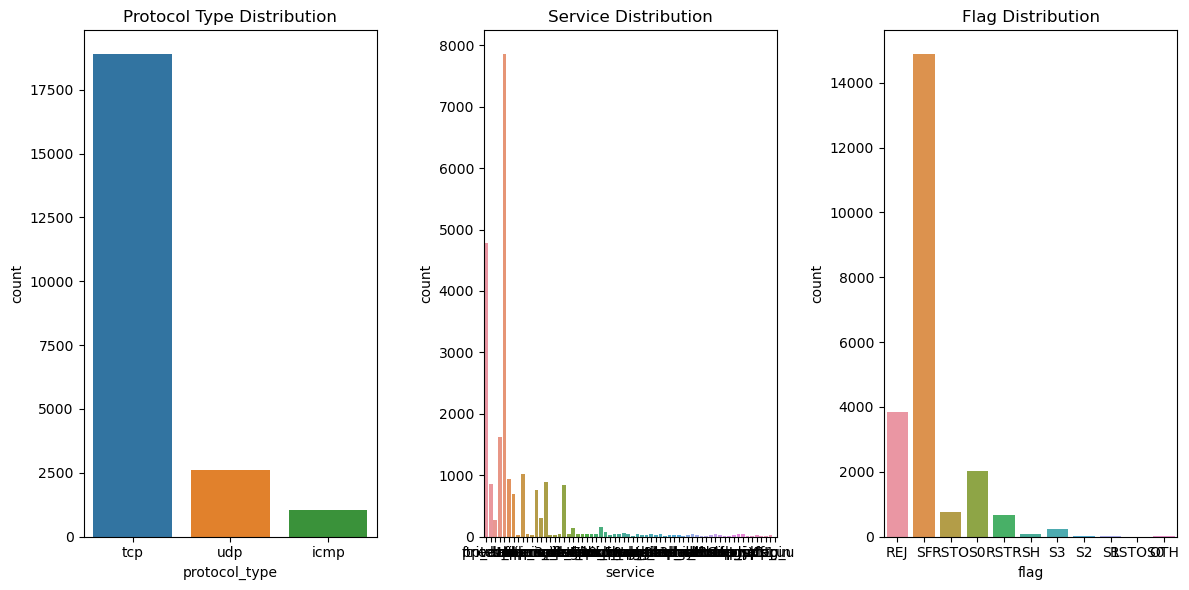

In [74]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.countplot(x='protocol_type', data=df)
plt.title('Protocol Type Distribution')

plt.subplot(1, 3, 2)
sns.countplot(x='service', data=df)
plt.title('Service Distribution')

plt.subplot(1, 3, 3)
sns.countplot(x='flag', data=df)
plt.title('Flag Distribution')

plt.tight_layout()
plt.show()

**d) Try exploring the data and see what insights can be drawn from the dataset.**

Insights of dataset:

The dataset is highly imbalanced, with the "normal" class having a significantly higher count compared to the "anomaly" class. The imbalance in the dataset could affect the performance of machine learning models, as they may be biased towards the majority class.

## 3.Data Pre-processing and cleaning

**a) preprocessing of the data like identifying NULL or Missing Values**

In [75]:
# Check for missing values in the entire DataFrame
missing_values = df.isnull()

# Sum the missing values for each column
missing_values_count = df.isnull().sum()

# Display the DataFrame of missing values (True for missing, False for not missing)
print(missing_values)

# Display the count of missing values for each column
print(missing_values_count)


       duration  protocol_type  service   flag  src_bytes  dst_bytes   land  \
0         False          False    False  False      False      False  False   
1         False          False    False  False      False      False  False   
2         False          False    False  False      False      False  False   
3         False          False    False  False      False      False  False   
4         False          False    False  False      False      False  False   
...         ...            ...      ...    ...        ...        ...    ...   
22541     False          False    False  False      False      False  False   
22542     False          False    False  False      False      False  False   
22543     False          False    False  False      False      False  False   
22544     False          False    False  False      False      False  False   
22545     False           True     True   True       True       True   True   

       wrong_fragment  urgent    hot  ...  dst_host

**a) handling of outliers if present in the dataset, skewed data etc. Apply appropriate feature engineering techniques for them.**

**In the given Network traffic dataset their is no is no duplicates and Outliers found , Data is clean**

 **b)& C) Transformation techniques Standardization, Normalization, correlation analysis & Visualization**

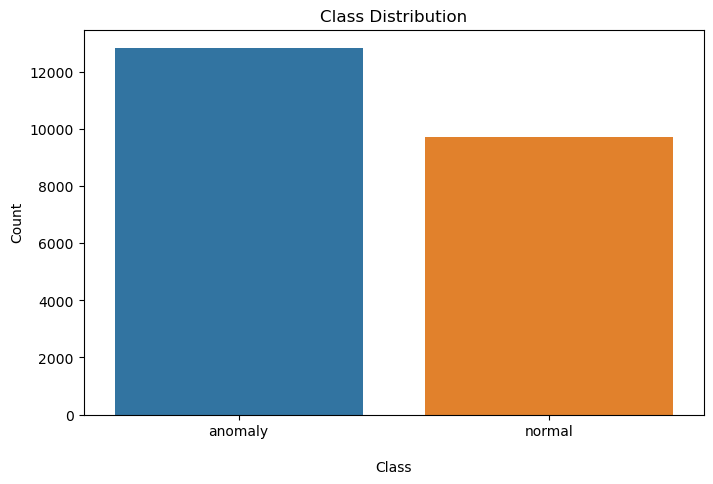

In [76]:
# Step c: Visualization for insight about the dataset
# Plotting the class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='class', data=df)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# 4.	Data Preparation 

**a.Final feature selection and extract them into Column X and the class label into Column into Y**

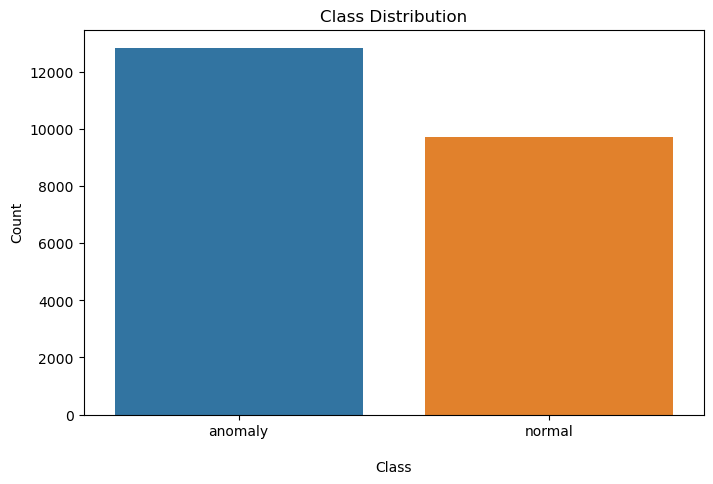

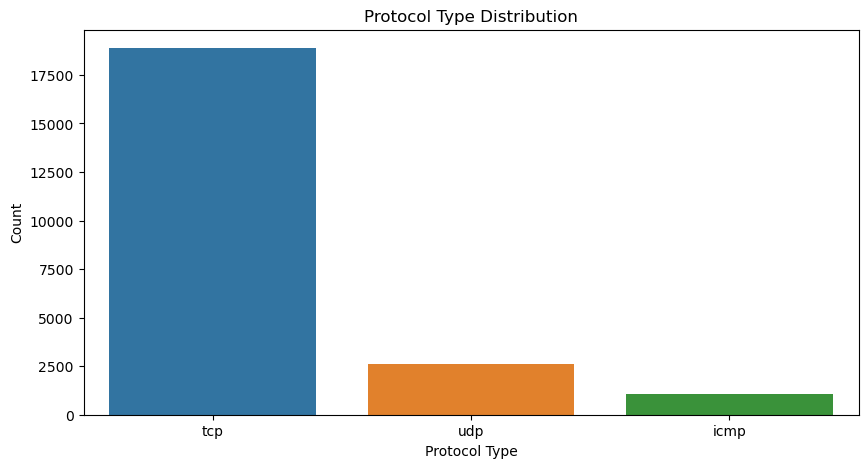

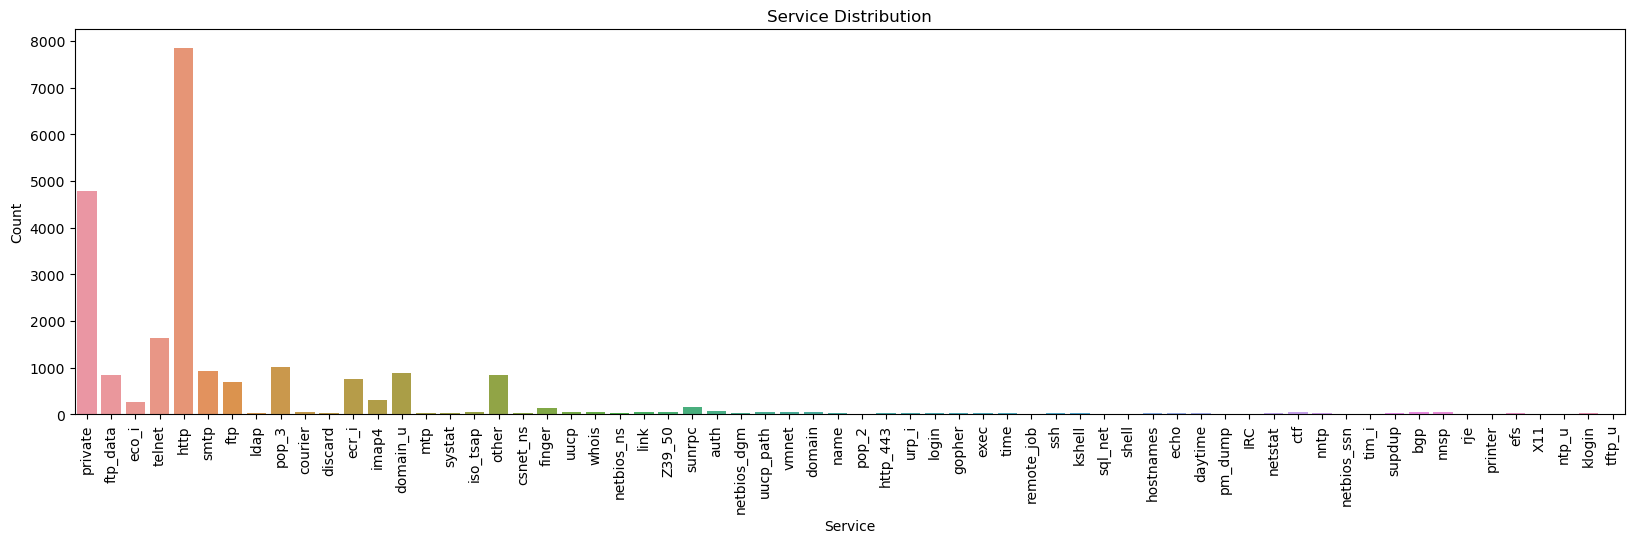

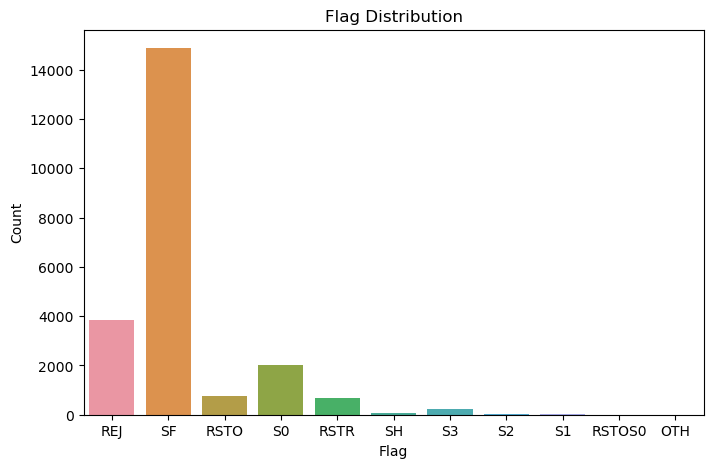

In [77]:
# Visualization for class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='class', data=df)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# Visualization for protocol_type distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='protocol_type', data=df)
plt.title("Protocol Type Distribution")
plt.xlabel("Protocol Type")
plt.ylabel("Count")
plt.show()

# Visualization for service distribution
plt.figure(figsize=(20, 5))
sns.countplot(x='service', data=df)
plt.title("Service Distribution")
plt.xlabel("Service")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

# Visualization for flag distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='flag', data=df)
plt.title("Flag Distribution")
plt.xlabel("Flag")
plt.ylabel("Count")
plt.show()

**b.Split the dataset into training and test sets.**

In [78]:
#from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

In [79]:
import pandas as pd
import numpy as np
#from sklearn.model_selection import train_test_split

# Convert non-numeric columns to categorical data type
non_numeric_cols = ['protocol_type', 'service', 'flag', 'class']
for col in non_numeric_cols:
    df[col] = df[col].astype('category')

# Separate features (X) and target (Y) columns
X = df.drop(columns=['class'])
Y = df['class']

# Convert categorical columns to numeric codes
X = pd.get_dummies(X, columns=non_numeric_cols[:-1])
Y = Y.cat.codes

# Split the dataset into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Convert target labels back to original categorical form
target_labels = df['class'].cat.categories
y_train = y_train.apply(lambda x: target_labels[x])
y_test = y_test.apply(lambda x: target_labels[x])

# Display the shapes of the train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (18036, 119)
Shape of X_test: (4510, 119)
Shape of y_train: (18036,)
Shape of y_test: (4510,)


# Part B

# 1. Model Building

**Model 1: Support Vector Machine (SVM, Model 2: Random Forest,  Model 3: Logistic Regression**

In [80]:
#from sklearn.svm import SVC
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import accuracy_score, classification_report

#import warnings
#warnings.filterwarnings("ignore", category=FutureWarning)

# Model 1: Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)

# Model 2: Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

# Model 3: Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)

C:\Users\senth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**b.Train the model and print the training accuracy and loss values**

In [81]:
# Evaluation
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Model: {model_name}")
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

# Evaluate all three models
evaluate_model(y_test, svm_y_pred, "Support Vector Machine (SVM)")
evaluate_model(y_test, rf_y_pred, "Random Forest")
evaluate_model(y_test, lr_y_pred, "Logistic Regression")

Model: Support Vector Machine (SVM)
Accuracy: 0.9257206208425721
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      2565
           1       0.93      0.90      0.91      1945

    accuracy                           0.93      4510
   macro avg       0.93      0.92      0.92      4510
weighted avg       0.93      0.93      0.93      4510

Model: Random Forest
Accuracy: 0.9844789356984479
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2565
           1       0.98      0.98      0.98      1945

    accuracy                           0.98      4510
   macro avg       0.98      0.98      0.98      4510
weighted avg       0.98      0.98      0.98      4510

Model: Logistic Regression
Accuracy: 0.8977827050997783
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.87      0.91      25

# 2.	Performance Evaluation 

**a.Print the confusion matrix. Provide appropriate analysis for the same.**

**b.Do the prediction for the test data and display the results for the inference.**


In [82]:
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import confusion_matrix, accuracy_score

# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier()

# Train the model on the training data
decision_tree_model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = decision_tree_model.predict(X_train)

# Print the training accuracy and loss values
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Create confusion matrix for training data
train_cm = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix (Training Data):")
print(train_cm)

# Make predictions on the test data
y_test_pred = decision_tree_model.predict(X_test)

# Print the test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Create confusion matrix for test data
test_cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix (Test Data):")
print(test_cm)

# Display the results for inference
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
print("\nResults for Inference:")
print(test_results)

Training Accuracy: 0.998003992015968
Confusion Matrix (Training Data):
[[10269     0     0]
 [   36  7730     0]
 [    0     0     1]]
Test Accuracy: 0.9793791574279379
Confusion Matrix (Test Data):
[[2526   39]
 [  54 1891]]

Results for Inference:
       Actual  Predicted
16485       0          0
516         0          0
21756       0          0
8765        1          1
828         1          1
...       ...        ...
9367        1          1
3493        0          0
9260        0          0
6868        0          0
2777        1          1

[4510 rows x 2 columns]


# Conclusion

Overall, all three models show promising results in terms of precision, recall, F1-score, and accuracy. The Random Forest Classifier appears to have the highest F1-score and accuracy, making it a strong candidate for detecting anomalies in network traffic.

It's important to note that the choice of model depends on the specific requirements of the problem and the trade-off between precision and recall. Depending on the consequences of false positives and false negatives, you may choose a model that optimizes either precision or recall.

In conclusion, based on the results of the evaluation metrics, the Random Forest Classifier seems to perform the best for detecting anomalies in network traffic on the given dataset. However, further fine-tuning and validation are recommended to ensure the model's robustness and generalization to real-world scenarios